<h1 style="background-color: purple; border: 2px solid black; color: black; display: table; margin: 0 auto; padding: 10px;">
  Zomato Restaurant Trends Analysis
</h1>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3 style="background-color: yellow; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Load And Read Data
</h3>


In [2]:
data=pd.read_csv('/kaggle/input/zomato-dataset/Zomato-data-.csv')

In [3]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


<h3 style="background-color: yellow; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  View Data
</h3>


In [4]:
data.shape

(148, 7)

In [5]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [6]:
data.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


<h4 style="text-align: center; color: #444;">Observations</h4>

<p>The <strong>Votes</strong> feature has a mean of 264.81 and a standard deviation of 653.68, indicating a large variation in the number of votes restaurants have received. The minimum number of votes is 0, while the maximum value is 4884, which suggests the presence of extreme outliers. The 25th percentile is 6.75, the median is 43.5, and the 75th percentile is 221.75. This indicates that most restaurants have a relatively low number of votes, but there are a few restaurants with exceptionally high numbers of votes. The distribution of the votes feature is right-skewed, meaning that the mean is much higher than the median, and the data is heavily influenced by a small number of restaurants with a large number of votes. The large standard deviation further emphasizes the spread of the data, showing that the data is not uniformly distributed.</p>

<p>On the other hand, the <strong>Approximate Cost for Two People</strong> feature has a mean of 418.24 and a standard deviation of 223.09. The minimum cost is 100, and the maximum is 950, with the 25th percentile at 200, the median at 400, and the 75th percentile at 600. This suggests that most restaurants have a cost for two people between 200 and 600, with a relatively moderate range. The distribution of this feature is semi-symmetric, with the mean being close to the median, indicating that the data is more balanced compared to the "Votes" feature. The lower standard deviation suggests less variability in the cost for two people compared to the votes feature. Most restaurants are clustered around the mid-range cost, and there are fewer extreme outliers in this case.</p>


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [8]:
data.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

<h3 style="background-color: yellow; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  EDA
</h3>


In [9]:
data['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

In [10]:
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

Text(0.5, 1.0, 'Null Values Heatmap')

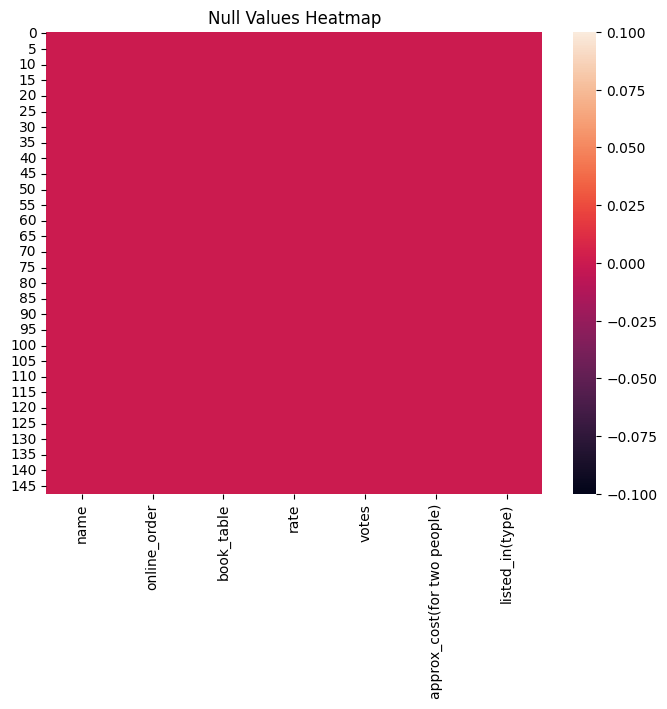

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull())
plt.title('Null Values Heatmap')

In [12]:
(data==np.inf).sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [13]:
(data==-np.inf).sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [14]:
data.duplicated().sum()

0

<Axes: >

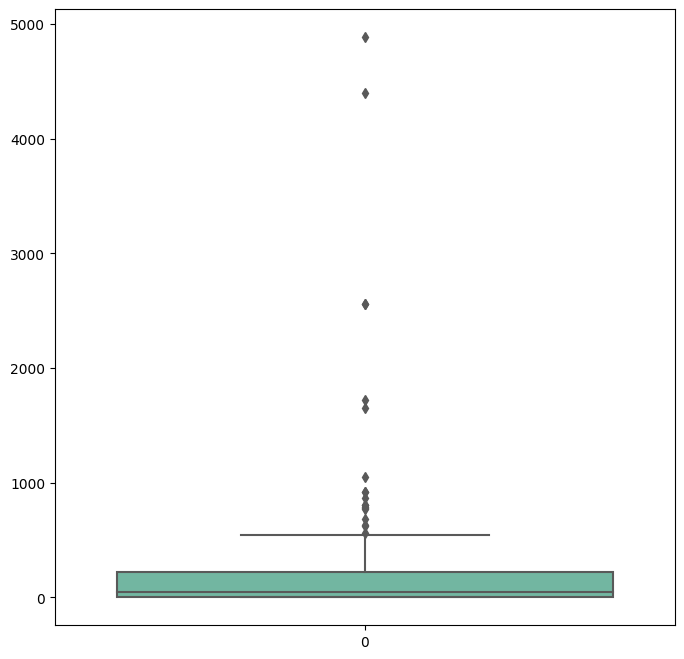

In [15]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data['votes'],palette='Set2')

<h3 style="background-color: yellow; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Cleaning Data
</h3>


In [16]:
data['name']=data['name'].astype('string')

In [17]:
data['listed_in(type)']=data['listed_in(type)'].astype('string')

In [18]:
Q1=data['votes'].quantile(0.25)
Q3=data['votes'].quantile(0.75)
IQR=Q3-Q1
upperlimit=Q3+1.5*IQR
data['votes']=data['votes'].apply(lambda x:min(x,upperlimit))

<Axes: >

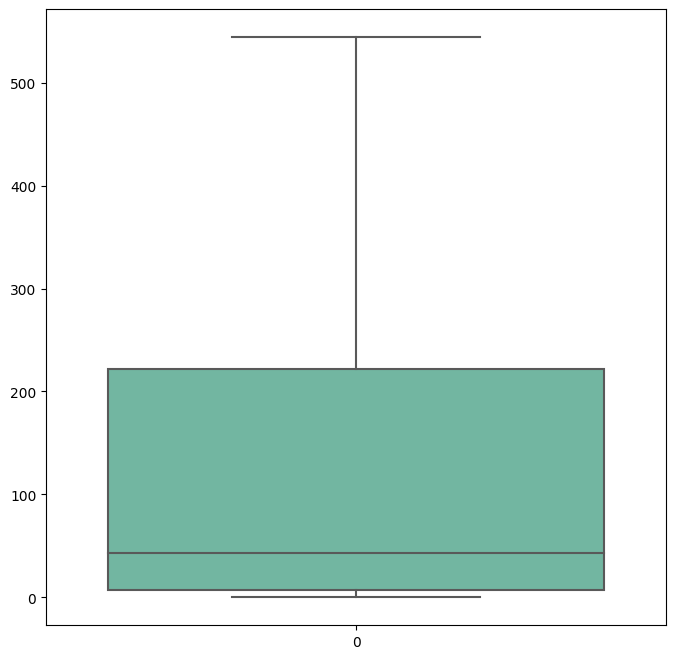

In [19]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data['votes'],palette='Set2')

<h3 style="background-color: yellow; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  visualization Data
</h3>


<Axes: ylabel='count'>

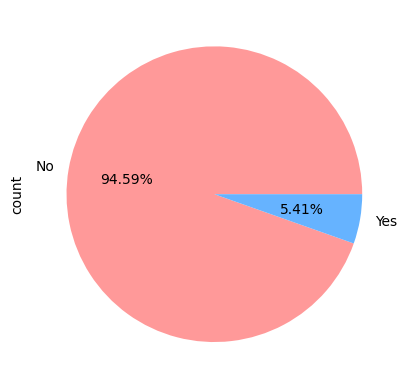

In [20]:
data['book_table'].value_counts().plot.pie(autopct='%.2f%%',colors=['#ff9999','#66b3ff','#99ff99'])

<h3 style="color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Data Feature: Book Table Bias
</h3>
<p>
  The data shows a bias towards people who do not book a table. This means that the majority of the individuals who come to the restaurant have not made a reservation in advance.
</p>


<Axes: ylabel='count'>

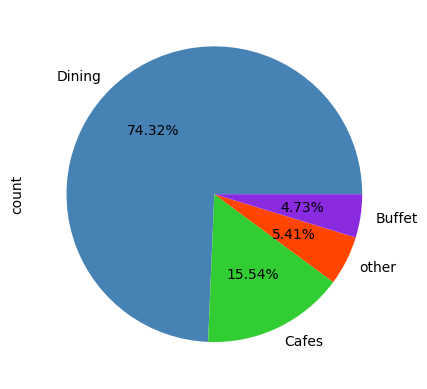

In [21]:
data['listed_in(type)'].value_counts().plot.pie(autopct='%.2f%%',colors=['#4682b4', '#32cd32', '#ff4500', '#8a2be2'])

<h3 style="color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Data Feature: listed_in(type) Bias to Dining
</h3>
<p>
  The data shows a bias towards the "Dining" category in the <strong>listed_in(type)</strong> feature. This means that a significant portion of the unique values in this feature corresponds to restaurants listed under the "Dining" category.
</p>


In [22]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

<Axes: xlabel='online_order', ylabel='listed_in(type)'>

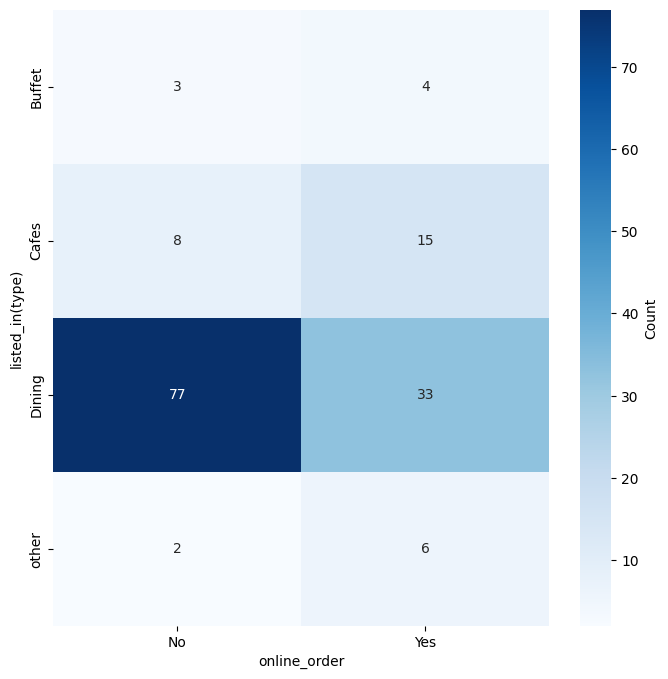

In [23]:
cross_tab=pd.crosstab(data['listed_in(type)'],data['online_order'])
plt.figure(figsize=(8,8))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', cbar_kws={'label': 'Count'})

In [24]:
pd.crosstab(data['online_order'],data['listed_in(type)'])

listed_in(type),Buffet,Cafes,Dining,other
online_order,,,,
No,3,8,77,2
Yes,4,15,33,6


<Axes: xlabel='online_order', ylabel='count'>

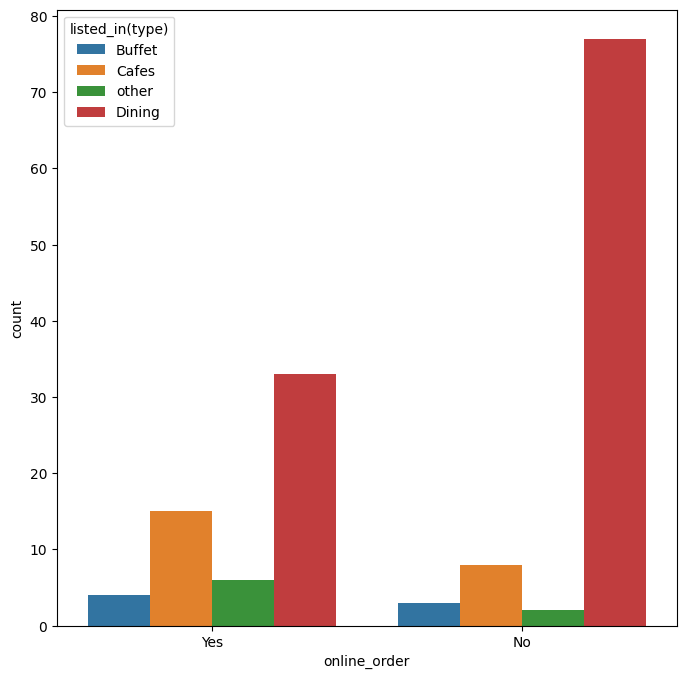

In [25]:

plt.figure(figsize=(8,8))
sns.countplot(x='online_order',data=data,hue='listed_in(type)')

In [26]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,544.25,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,544.25,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,544.25,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88.00,300,Buffet
4,Grand Village,No,No,3.8/5,166.00,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0.00,100,Dining
144,New Indraprasta,No,No,3.3/5,0.00,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,544.25,450,Dining
146,Darbar,No,No,3.0/5,98.00,800,Dining


In [27]:
data['book_table'] = data['book_table'].map({'Yes': 1, 'No': 0})

In [28]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,1,4.1/5,544.25,800,Buffet
1,Spice Elephant,Yes,0,4.1/5,544.25,800,Buffet
2,San Churro Cafe,Yes,0,3.8/5,544.25,800,Buffet
3,Addhuri Udupi Bhojana,No,0,3.7/5,88.00,300,Buffet
4,Grand Village,No,0,3.8/5,166.00,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,0,3.3/5,0.00,100,Dining
144,New Indraprasta,No,0,3.3/5,0.00,150,Dining
145,Anna Kuteera,Yes,0,4.0/5,544.25,450,Dining
146,Darbar,No,0,3.0/5,98.00,800,Dining


<Axes: ylabel='count'>

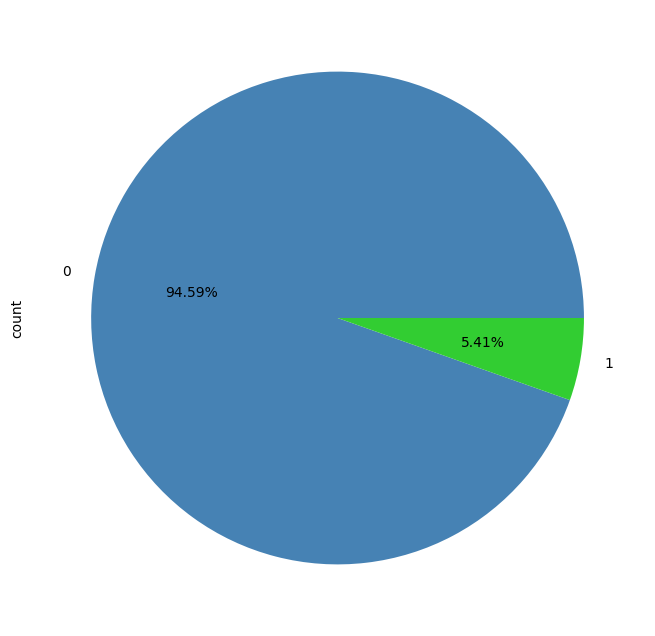

In [29]:
plt.figure(figsize=(8,8))
data['book_table'].value_counts().plot.pie(autopct='%.2f%%',colors=['#4682b4', '#32cd32'])

In [30]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

<Axes: ylabel='count'>

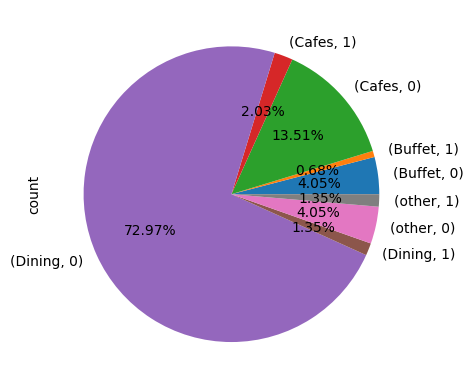

In [31]:
(data.groupby('listed_in(type)')['book_table']).value_counts().plot.pie(autopct='%.2f%%')

Text(0, 0.5, 'Count')

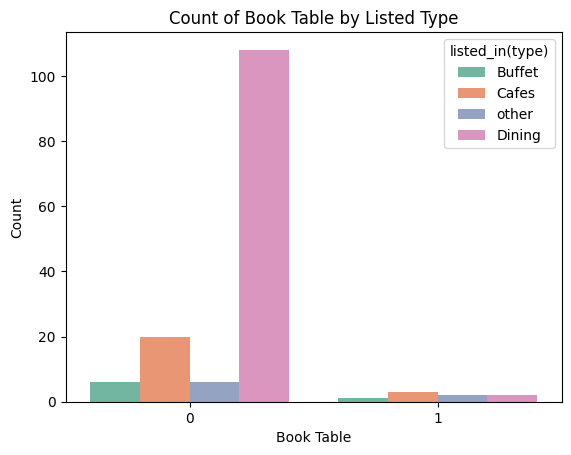

In [32]:
sns.countplot(x='book_table', data=data, hue='listed_in(type)', palette='Set2')
plt.title("Count of Book Table by Listed Type")
plt.xlabel("Book Table")
plt.ylabel("Count")

<h3 style="color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Data Feature: Book Table and Type Bias to Dining
</h3>
<p>
  The data reveals that most individuals who choose the "Dining" type do not book a table. This suggests that the "Book Table" feature shows a bias toward people who prefer dining without making prior reservations.
</p>
